In [6]:
# Basic Libs
import pandas as pd
import numpy as np
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv('../cs-215-assignment-3-multiple-variate-regression/train.csv')

In [8]:
train.shape

(15000, 19)

Checking For Null Values

In [9]:
train.isna().sum().sum()

0

[Feature Description](https://www.kaggle.com/datasets/shashwatwork/wild-blueberry-yield-prediction-dataset/data)

| Feature                    | Unit            | Description                                                                                      |
|----------------------------|-----------------|--------------------------------------------------------------------------------------------------|
| Clonesize                  | m²              | The average blueberry clone size in the field                                                   |
| Honeybee                   | bees/m²/min     | Honeybee density in the field                                                                    |
| Bumbles                    | bees/m²/min     | Bumblebee density in the field                                                                    |
| Andrena                    | bees/m²/min     | Andrena bee density in the field                                                                  |
| Osmia                      | bees/m²/min     | Osmia bee density in the field                                                                    |
| MaxOfUpperTRange          | ℃               | The highest record of the upper band daily air temperature during the bloom season               |
| MinOfUpperTRange          | ℃               | The lowest record of the upper band daily air temperature                                        |
| AverageOfUpperTRange      | ℃               | The average of the upper band daily air temperature                                              |
| MaxOfLowerTRange          | ℃               | The highest record of the lower band daily air temperature                                        |
| MinOfLowerTRange          | ℃               | The lowest record of the lower band daily air temperature                                         |
| AverageOfLowerTRange      | ℃               | The average of the lower band daily air temperature                                              |
| RainingDays                | Day             | The total number of days during the bloom season, each of which has precipitation larger than zero|
| AverageRainingDays         | Day             | The average of raining days of the entire bloom season                                           |


## Data Inspection

The $id$ and $Row\#$ columns are not features, therefore we drop them

In [10]:
data = train.drop(columns=['id', 'Row#'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15000 non-null  float64
 1   honeybee              15000 non-null  float64
 2   bumbles               15000 non-null  float64
 3   andrena               15000 non-null  float64
 4   osmia                 15000 non-null  float64
 5   MaxOfUpperTRange      15000 non-null  float64
 6   MinOfUpperTRange      15000 non-null  float64
 7   AverageOfUpperTRange  15000 non-null  float64
 8   MaxOfLowerTRange      15000 non-null  float64
 9   MinOfLowerTRange      15000 non-null  float64
 10  AverageOfLowerTRange  15000 non-null  float64
 11  RainingDays           15000 non-null  float64
 12  AverageRainingDays    15000 non-null  float64
 13  fruitset              15000 non-null  float64
 14  fruitmass             15000 non-null  float64
 15  seeds              

Observe the number of unique values for each feature in the dataset

In [12]:
data.nunique()

clonesize                  6
honeybee                   7
bumbles                    9
andrena                   12
osmia                     10
MaxOfUpperTRange           5
MinOfUpperTRange           6
AverageOfUpperTRange       5
MaxOfLowerTRange           5
MinOfLowerTRange           5
AverageOfLowerTRange       8
RainingDays                5
AverageRainingDays         5
fruitset                1075
fruitmass               1087
seeds                   1218
yield                    777
dtype: int64

## Exploratory Data Analysis

In [13]:
data.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,19.720333,0.383967,0.285445,0.487979,0.589398,82.223840,49.703600,68.700520,59.267747,28.678920,48.600493,18.689772,0.325415,0.501637,0.446335,36.134737,6033.586197
std,6.644401,0.260647,0.059179,0.147186,0.144559,9.080973,5.506574,7.586826,6.562923,3.172043,5.354241,11.826593,0.166033,0.076552,0.038003,4.094260,1349.801334
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.246568,22.079199,1637.704020
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.453462,0.418732,33.267137,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506346,0.446570,36.040675,6132.417380
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.564795,0.472670,39.158238,7044.567610
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,68.200000,34.000000,0.560000,0.917343,0.757564,46.718182,8969.401840


In [14]:
data.skew()

clonesize                0.079657
honeybee                47.025003
bumbles                  0.874278
andrena                  0.214240
osmia                   -0.808857
MaxOfUpperTRange        -0.012435
MinOfUpperTRange        -0.017273
AverageOfUpperTRange    -0.024386
MaxOfLowerTRange        -0.017295
MinOfLowerTRange        -0.014632
AverageOfLowerTRange    -0.010797
RainingDays             -0.271023
AverageRainingDays       0.055130
fruitset                -0.445963
fruitmass               -0.081223
seeds                    0.019632
yield                   -0.330371
dtype: float64

The honey bee feature has high skew. Let us examine it.

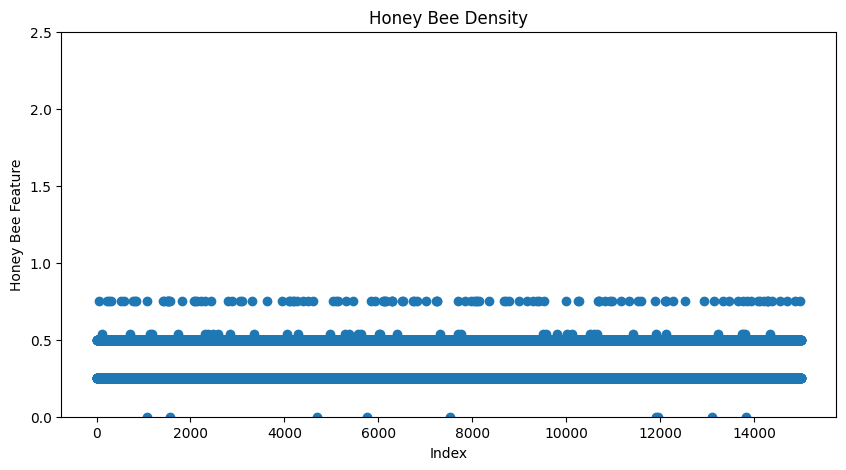

In [15]:
# plot honey bee feature to visualize kurtosis
plt.figure(figsize=(10, 5))
plt.plot(data['honeybee'], 'o')
plt.xlabel('Index')
plt.ylabel('Honey Bee Feature')
plt.title('Honey Bee Density')
plt.ylim(0,2.5)
plt.show()


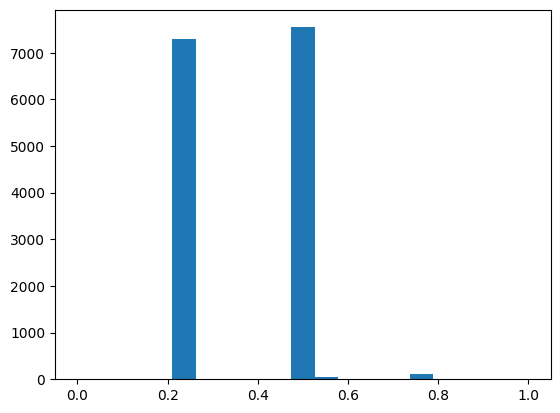

In [16]:
bins = np.linspace(0, 1, 20)
plt.hist(data['honeybee'], bins)
plt.show()

In [17]:
# all distict values in the honeybee feature
data['honeybee'].unique()

array([ 0.5  ,  0.25 ,  0.75 ,  0.537, 18.43 ,  0.   ,  6.64 ])

In [18]:
# number of values in the honeybee feature not eaqual to 0.25 and 0.537
data['honeybee'].loc[(data['honeybee'] != 0.25) & (data['honeybee'] != 0.5)].count()

171

So most of the HoneyBee Density Values are either 0.25 or 0.5. 

Correlation Histogram

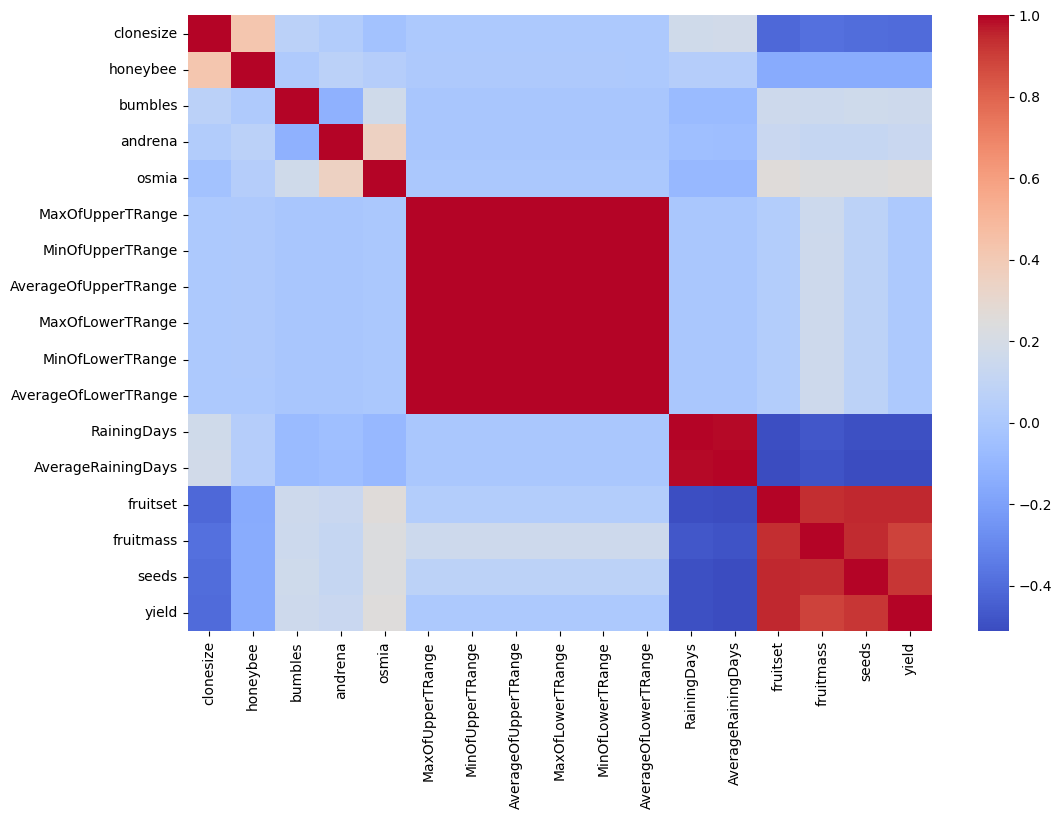

In [19]:
# heatmap of the correlation histogram
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(),  cmap='coolwarm')
plt.show()

Here we see that the features MaxOfUpperTRange, MinOfUpperTRange, AverageOfUpperTRange, MaxOfLowerTRange, MinOfLowerTRange and AverageOfLowerTRange have very little correlation with the data. Also, they are highly correlated within themselves. 

We can also observe that 'fruitset', 'fruitmass' and 'seeds' are highly correlated with 'yield'. Hence, it makes sense to explore their relation with yield, by checking if their higher powers would give us a better fit.

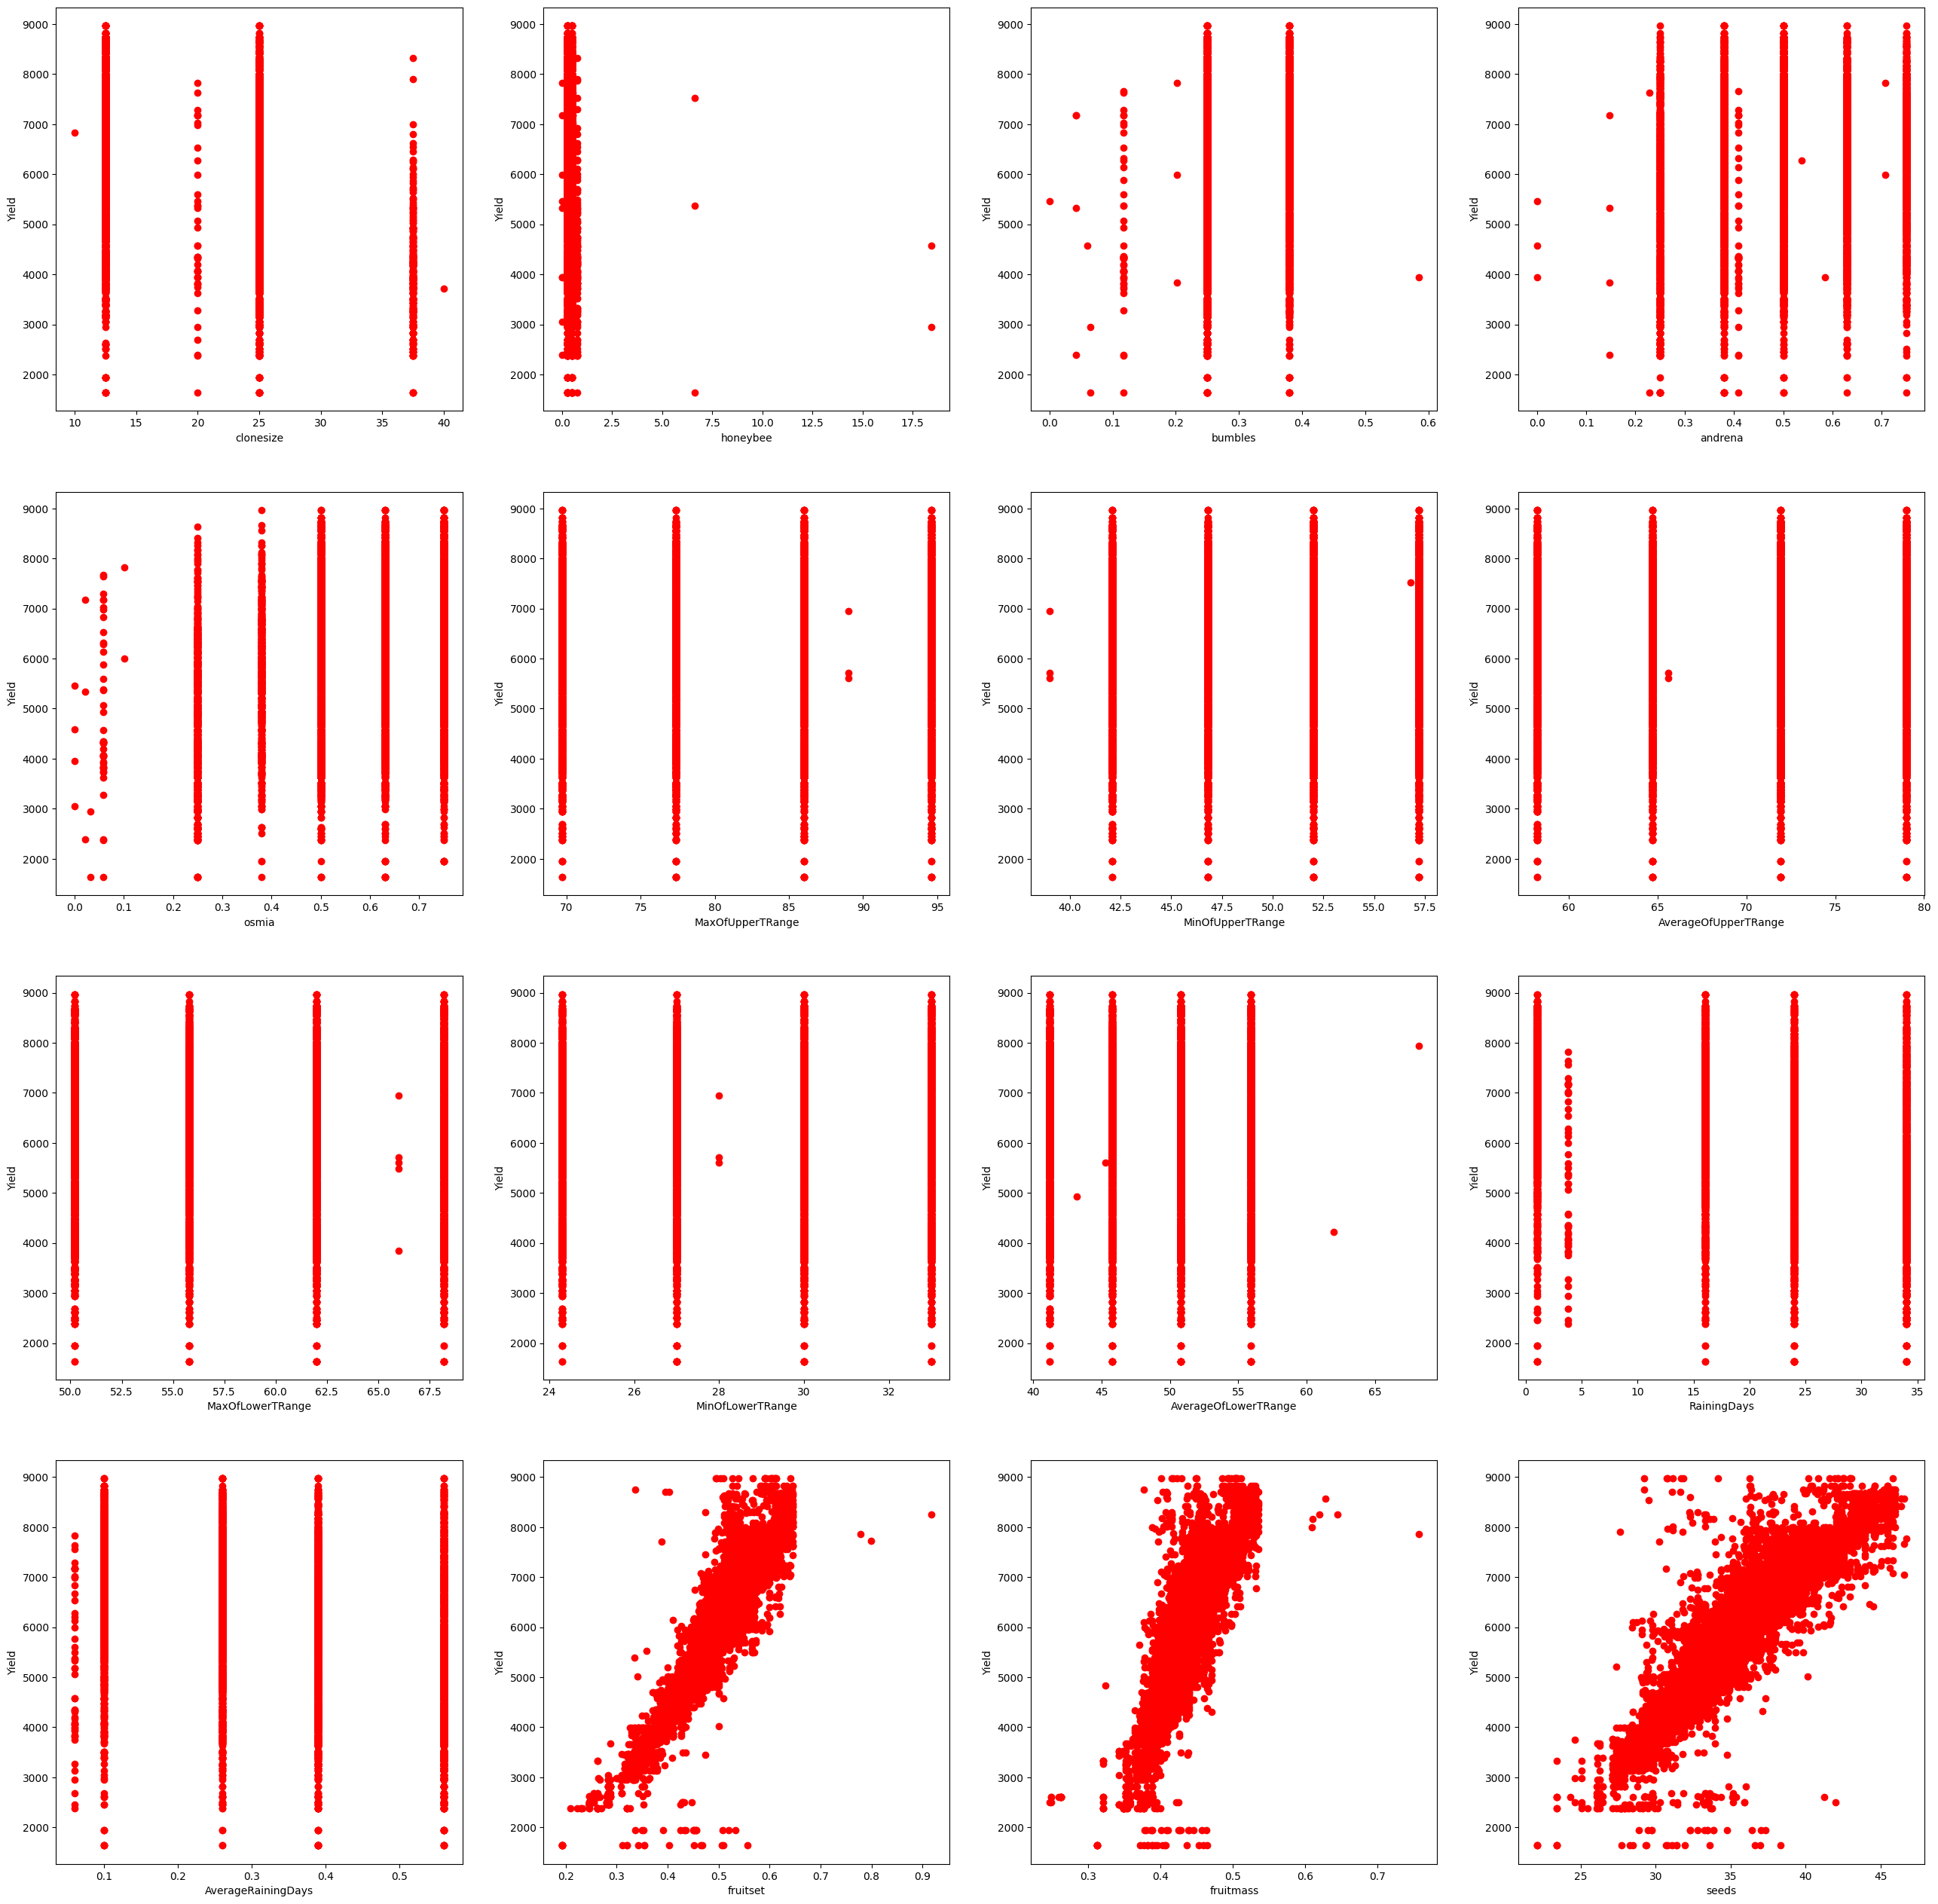

In [23]:
# plot all the features against yield 
plt.figure(figsize=(32, 32))
for i, col in enumerate(data.columns[:-1]):
	plt.subplot(4,4, i+1)
	plt.scatter(data[col], data['yield'],color='red')
	plt.xlabel(col)
	plt.ylabel('Yield')

We can observe that even from the correlation plot, that 'fruitset', 'fruitmass' and 'seeds' can have a polynomial relation with 'yield'.

In [21]:
def residual_analysis(y_pred, y_true):
    residuals = y_pred - y_true
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True)
    plt.title('Residuals Histogram')
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_true, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs True Values')
    plt.show()

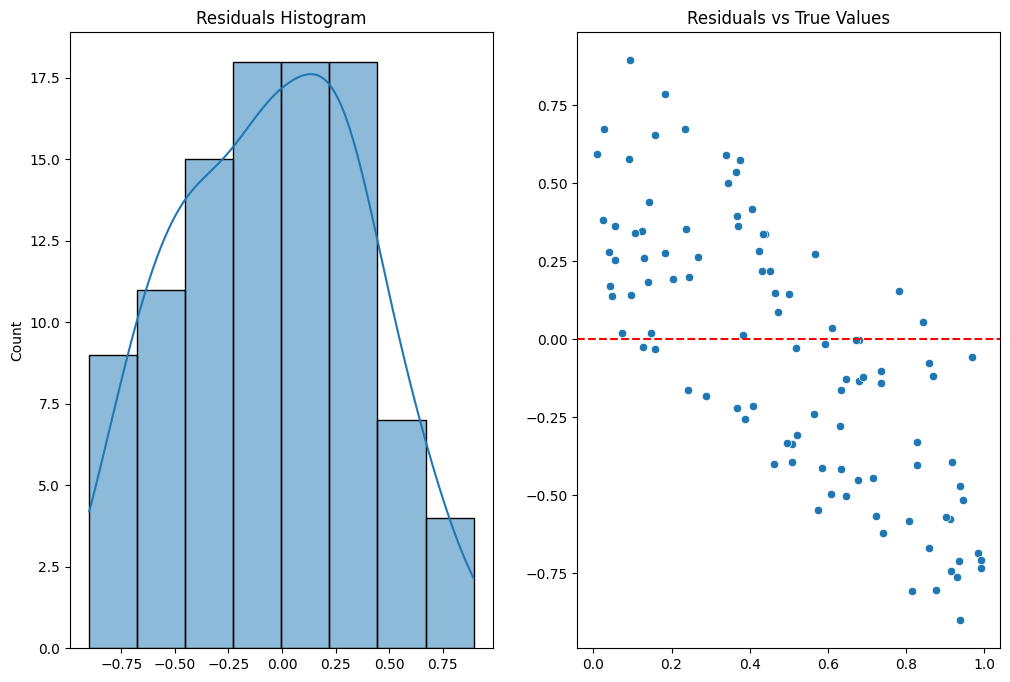

In [22]:
y_pred = np.random.rand(100)
y_true = np.random.rand(100)
residual_analysis(y_pred, y_true)